In [56]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Import Dependencies

In [2]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Datetime
import datetime as dt

# SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
#create enginge for the 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

## These two things give me the same thing

In [4]:
#Use inspector to explore the database and print the table names 
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

## Reflect Tables into SQLAlchemy ORM

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Query percipitation data for the last 12 months

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
sel = [Measurement.date, func.avg(Measurement.prcp)]
past_12mo = session.query(*sel).filter(Measurement.date.between('2016-08-23', '2017-08-23')).group_by(Measurement.date).\
    order_by(Measurement.date).all()
print(past_12mo)

[('2016-08-23', 0.45166666666666666), ('2016-08-24', 1.5549999999999997), ('2016-08-25', 0.07714285714285715), ('2016-08-26', 0.016666666666666666), ('2016-08-27', 0.06399999999999999), ('2016-08-28', 0.5166666666666666), ('2016-08-29', 0.24333333333333332), ('2016-08-30', 0.011666666666666667), ('2016-08-31', 0.6359999999999999), ('2016-09-01', 0.006), ('2016-09-02', 0.05), ('2016-09-03', 0.254), ('2016-09-04', 0.276), ('2016-09-05', 0.08499999999999999), ('2016-09-06', 0.246), ('2016-09-07', 0.3333333333333333), ('2016-09-08', 0.07666666666666667), ('2016-09-09', 0.17833333333333332), ('2016-09-10', 0.27999999999999997), ('2016-09-11', 0.25), ('2016-09-12', 0.308), ('2016-09-13', 0.45166666666666666), ('2016-09-14', 2.3800000000000003), ('2016-09-15', 0.8266666666666667), ('2016-09-16', 0.11714285714285715), ('2016-09-17', 0.13599999999999998), ('2016-09-18', 0.10600000000000001), ('2016-09-19', 0.064), ('2016-09-20', 0.14714285714285716), ('2016-09-21', 0.19499999999999998), ('2016-

In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(past_12mo, columns =['date', 'percipitation'])
prcp_df.set_index('date', inplace = True)


In [11]:
#look at it
prcp_df

,percipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000


## Exploratory Climate Analysis

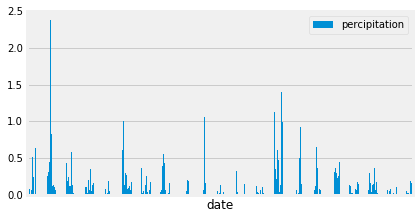

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot.bar()
plt.tight_layout()
plt.xticks([])
plt.show()

# this is a weird looking graph!

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
prcp_df.describe()

,percipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [14]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
inspector.get_table_names()
inspector.get_columns('station')


[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

## Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
stations

9

In [33]:
 # What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
      func.count(Measurement.station)]

station_max = session.query(*sel).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_max

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sel = [Measurement.tobs,
      func.max(Measurement.tobs),
      func.min(Measurement.tobs),
      func.avg(Measurement.tobs)]

station_temp = session.query(*sel).filter(Measurement.station == 'USC00519281').\
    all()

station_temp

[(54.0, 85.0, 54.0, 71.66378066378067)]

## Get the temperature for the past 12 months for the station with the highest observations

In [45]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.station,
      Measurement.tobs]

temp_12mo = session.query(*sel).filter(Measurement.date.between('2016-08-23', '2017-08-23')).\
    filter(Measurement.station =='USC00519281').all()
print(temp_12mo)


[('USC00519281', 77.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 75.0), ('USC00519281', 73.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 73.0), ('USC00519281', 74.0), ('USC00519281', 80.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 76.0), ('USC00519281', 79.0), ('USC00519281', 75.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 76.0), ('USC00519281', 74.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519

## Graph it

In [47]:
# Save the query results as a Pandas DataFrame
tobs_df = pd.DataFrame(temp_12mo, columns =['station', 'tobs'])
tobs_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


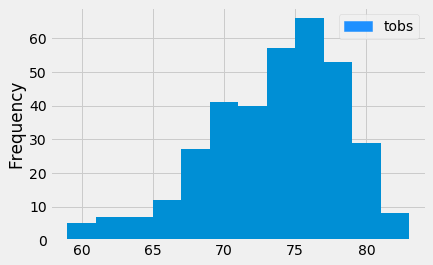

In [58]:
plt.hist(tobs_df['tobs'], bins=12)
plt.ylabel('Frequency')
blue_patch = mpatches.Patch(color='dodgerblue', label='tobs')
plt.legend(handles=[blue_patch])
plt.show()